Principal Component Analysis (PCA) is a fundamental dimensionality reduction technique widely used in statistics and machine learning. Given a dataset with potentially correlated features, PCA transforms the data into a new coordinate system such that the greatest variance by any projection of the data lies on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This helps in reducing the number of variables while retaining most of the information present in the dataset.

Mathematically, consider a data matrix $X \in \mathbb{R}^{n \times d}$, where $n$ is the number of samples and $d$ the number of features. PCA proceeds as follows:

1. **Center the data:** Subtract the mean of each feature: $\tilde{X} = X - \mu$, where $\mu$ is the vector of feature means.
2. **Compute the covariance matrix:** $C = \frac{1}{n-1}\tilde{X}^T\tilde{X}$.
3. **Eigen decomposition:** Find the eigenvalues and eigenvectors of $C$. The eigenvectors (principal components) determine the directions of maximum variance, while the eigenvalues quantify the variance in those directions.
4. **Project the data:** To reduce the dimensionality from $d$ to $k$ (where $k < d$), select the top $k$ eigenvectors (those with the largest eigenvalues) and project the centered data onto this $k$-dimensional subspace.

Formally, if $W_k$ is the $d \times k$ matrix containing the $k$ eigenvectors as columns, the dimension-reduced data is $Z = \tilde{X} W_k$.

PCA is intimately tied to the singular value decomposition (SVD) of the data matrix and provides the best low-rank approximation of the data in the least squares sense. Since PCA seeks directions with maximal variance, it is sensitive to the scaling of variables, meaning features with larger variance can dominate the principal components unless the dataset is standardized.

PCA is commonly used for data visualization, noise reduction, and as a preprocessing step for downstream machine learning algorithms.


/tmp/ipykernel_134063/2318862409.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, size=300)


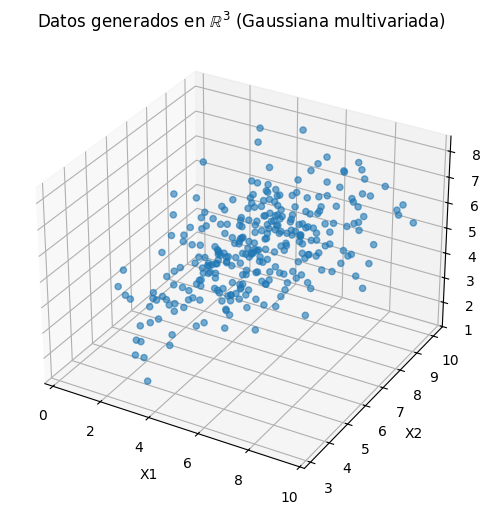

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos en R^3 siguiendo una distribución gaussiana multivariada
np.random.seed(0)
mean = [5, 7, 5]
cov = [[3, 1, 1],
       [1, 2, 1.5],
       [1, 0.5, 1]]  # matriz de covarianza no diagonal, datos correlacionados
X = np.random.multivariate_normal(mean, cov, size=300)

# Graficar los datos en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Datos generados en $\\mathbb{R}^3$ (Gaussiana multivariada)')
plt.show()


In [7]:
X.shape

(300, 3)

In [9]:
# Compute SVD of X
U, S, VT = np.linalg.svd(X-X.mean(axis=0), full_matrices=False)



In [10]:
U.shape, S.shape, VT.shape

((300, 3), (3,), (3, 3))

In [14]:
# Implementación "manual" de PCA para X (usando solo numpy)
# 1. Centrar los datos
X_centered = X - X.mean(axis=0)

# 2. Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# 3. Calcular autovalores y autovectores de la matriz de covarianza
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# 4. Ordenar los componentes principales por varianza (autovalores)
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

# 5. Proyectar los datos sobre los componentes principales
X_pca = X_centered @ eigvecs_sorted

# Las variables relevantes ahora son:
# - eigvecs_sorted: componentes principales (direcciones)
# - eigvals_sorted: varianzas explicadas
# - X_pca: datos proyectados

# Mostrar resultados breves
eigvals_sorted, eigvecs_sorted, X_pca[:5]  # Primeras 5 filas proyectadas


(array([4.31453262, 1.57655883, 0.37293415]),
 array([[-0.79332379, -0.60487903, -0.06898343],
        [-0.4460011 ,  0.65456553, -0.6104318 ],
        [-0.41439157,  0.45350338,  0.78905913]]),
 array([[ 3.58684715, -0.83613129,  0.68794788],
        [ 4.41034485, -2.76351099, -0.53511664],
        [ 1.95479738, -0.05283019, -0.01366928],
        [ 0.83718443, -0.30272033,  1.02556762],
        [ 1.54766897, -0.3498604 ,  0.35837731]]))

In [27]:
!pip install ipywidgets

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos originales
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='b', alpha=0.4, label='X original')

# Dibujar líneas en la dirección de los tres primeros componentes principales
origin = X.mean(axis=0)  # origen en el centroide
t = np.linspace(-5, 5, 50)  # escala arbitraria para visualizar
colors = ['r', 'g', 'm']
labels = [
    'Primer componente principal',
    'Segundo componente principal',
    'Tercer componente principal'
]

for i in range(3):
    pc_vec = eigvecs_sorted[:, i]
    line = origin + np.outer(t, pc_vec)
    ax.plot(line[:, 0], line[:, 1], line[:, 2], color=colors[i], lw=3, label=labels[i])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Datos originales y eje del primer PC')
ax.legend()
plt.show()


Primeras 5 filas de X proyectadas a 2D:
[[ 3.58684715 -0.83613129]
 [ 4.41034485 -2.76351099]
 [ 1.95479738 -0.05283019]
 [ 0.83718443 -0.30272033]
 [ 1.54766897 -0.3498604 ]]

Eigenvectores (componentes principales usados para 2D):
[[-0.79332379 -0.60487903]
 [-0.4460011   0.65456553]
 [-0.41439157  0.45350338]]


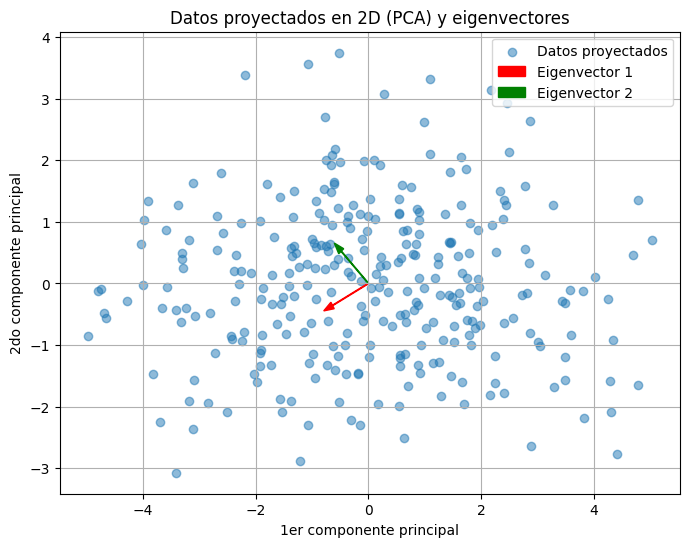

In [24]:
# Proyectar X en 2 dimensiones usando los dos primeros componentes principales
X_pca_2d = X_centered @ eigvecs_sorted[:, :2]
eigenvectors_2d = eigvecs_sorted[:, :2]

# Mostrar las primeras 5 filas proyectadas a 2D
print('Primeras 5 filas de X proyectadas a 2D:')
print(X_pca_2d[:5])

# Mostrar los eigenvectores correspondientes
print('\nEigenvectores (componentes principales usados para 2D):')
print(eigenvectors_2d)

# Opcional: graficar los datos proyectados en 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, label='Datos proyectados')

# Dibujar los eigenvectores en el gráfico
origin = np.zeros(2)
for i in range(2):
    vec = eigenvectors_2d[:, i]
    plt.arrow(origin[0], origin[1], vec[0], vec[1], 
              color=['red', 'green'][i], 
              width=0.01, head_width=0.12, 
              length_includes_head=True,
              label=f'Eigenvector {i+1}')

plt.xlabel('1er componente principal')
plt.ylabel('2do componente principal')
plt.title('Datos proyectados en 2D (PCA) y eigenvectores')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
U

array([[-9.98643311e-02,  3.85109111e-02,  6.51484162e-02],
       [-1.22792001e-01,  1.27283032e-01, -5.06753536e-02],
       [-5.44251050e-02,  2.43327643e-03, -1.29447545e-03],
       [-2.33087333e-02,  1.39428292e-02,  9.71208845e-02],
       [-4.30899116e-02,  1.61140277e-02,  3.39382020e-02],
       [-1.49763881e-02,  9.18484655e-02,  6.02047684e-04],
       [-1.90723918e-02, -3.96837505e-02, -1.52922292e-01],
       [-3.47032670e-02,  5.87816228e-02, -3.57731263e-02],
       [-1.33207272e-01, -6.25845355e-02, -8.96960066e-04],
       [ 1.43863860e-02,  8.87648495e-02,  1.05153343e-01],
       [-7.39837608e-03,  2.77325137e-02, -4.52587435e-02],
       [ 1.12498040e-01, -2.96437314e-02,  2.19906678e-02],
       [-6.69064937e-02,  8.17348904e-02, -1.42214065e-02],
       [ 1.52608293e-02, -5.61805726e-02, -8.23232526e-02],
       [ 1.02861857e-01,  1.03773082e-01, -1.06911589e-02],
       [ 2.18399819e-02, -7.08862361e-02,  5.23671199e-02],
       [ 9.21897759e-02, -1.83495016e-02